In [22]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


# Alcohol Consumption — Exploratory Data Analysis

This notebook performs initial data exploration on `Alcohol_Consumption_US.csv`. It loads the data, shows basic summaries, checks missing values, plots distributions for numeric features, and creates a correlation heatmap.

In [23]:
# Load the dataset (assumes the CSV sits next to this notebook)
data_path = Path('Alcohol_Consumption_US.csv')
df = pd.read_csv(data_path)
print(f'Loaded {data_path} — shape: {df.shape}')
df.head()

Loaded Alcohol_Consumption_US.csv — shape: (2040, 7)


,State,State_abbrev,Year,Beer (Per capita consumption),Wine (Per capita consumption),Spirits (Per capita consumption),All beverages (Per capita consumption)
0,Alabama,AL,2016,1.09,0.26,0.65,2.01
1,Alabama,AL,2015,1.11,0.26,0.64,2.01
2,Alabama,AL,2014,1.13,0.25,0.62,2.00
3,Alabama,AL,2013,1.14,0.25,0.60,1.99
4,Alabama,AL,2012,1.16,0.24,0.60,2.00


In [24]:
print('Columns:', list(df.columns))
print('\nData types and non-null counts:')
df.info()
display(df.describe(include='all'))

Columns: ['State', 'State_abbrev', 'Year', 'Beer (Per capita consumption)', 'Wine (Per capita consumption)', 'Spirits (Per capita consumption)', 'All beverages (Per capita consumption)']

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   State                                   2040 non-null   object 
 1   State_abbrev                            2040 non-null   object 
 2   Year                                    2040 non-null   int64  
 3   Beer (Per capita consumption)           2040 non-null   float64
 4   Wine (Per capita consumption)           2040 non-null   float64
 5   Spirits (Per capita consumption)        2040 non-null   float64
 6   All beverages (Per capita consumption)  2040 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage:

,State,State_abbrev,Year,Beer (Per capita consumption),Wine (Per capita consumption),Spirits (Per capita consumption),All beverages (Per capita consumption)
count,2040,2040,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
unique,51,51,NaN,NaN,NaN,NaN,NaN
top,Alabama,AL,NaN,NaN,NaN,NaN,NaN
freq,40,40,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1996.500000,1.292020,0.339324,0.851485,2.483176
std,NaN,NaN,11.546227,0.234227,0.184980,0.362751,0.637313
min,NaN,NaN,1977.000000,0.630000,0.080000,0.360000,1.190000
25%,NaN,NaN,1986.750000,1.130000,0.200000,0.630000,2.090000
50%,NaN,NaN,1996.500000,1.280000,0.300000,0.770000,2.370000
75%,NaN,NaN,2006.250000,1.420000,0.450000,0.960000,2.710000


This step is very important for the integration phase because we need to know what data types are being used and if they are consistent or not.

Another check is for completeness, spotting missing values is crucial in this process. Run the next cell to see missing value counts.

In [25]:
# Missing values overview
missing = df.isnull().sum().sort_values(ascending=False)
display(missing[missing > 0])

Series([], dtype: int64)

Numeric columns: ['Year', 'Beer (Per capita consumption)', 'Wine (Per capita consumption)', 'Spirits (Per capita consumption)', 'All beverages (Per capita consumption)']


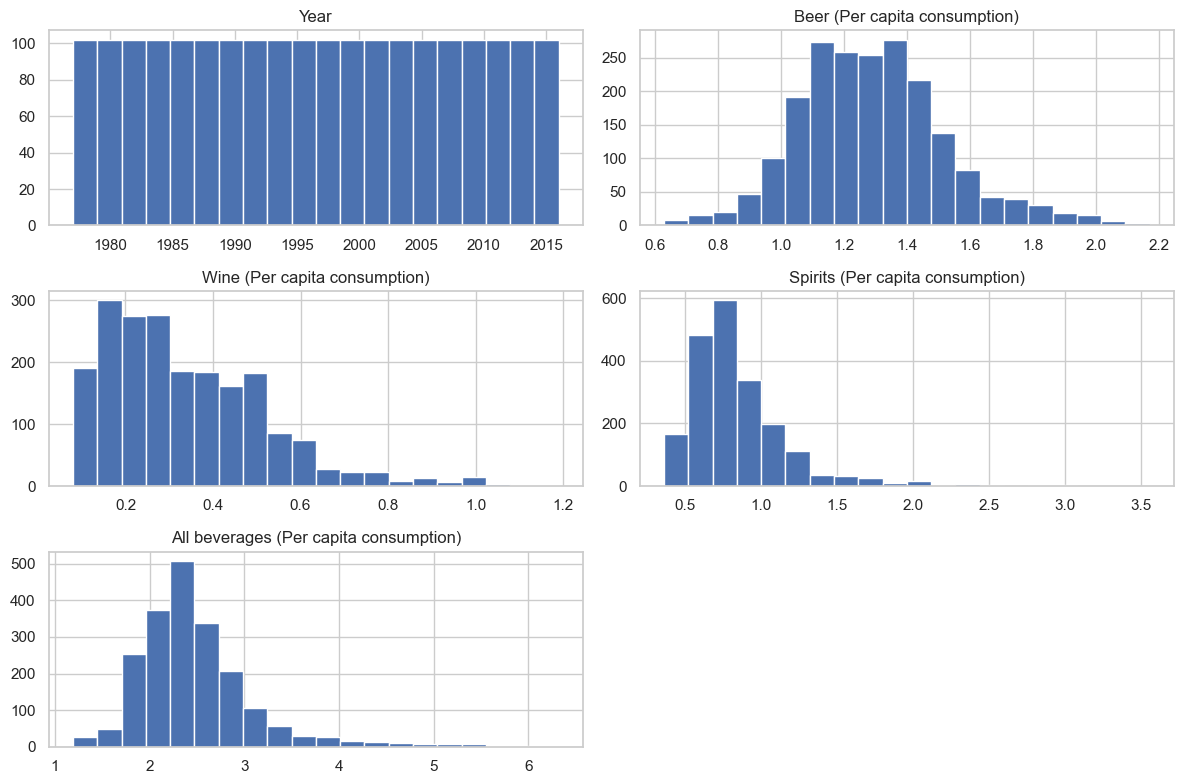

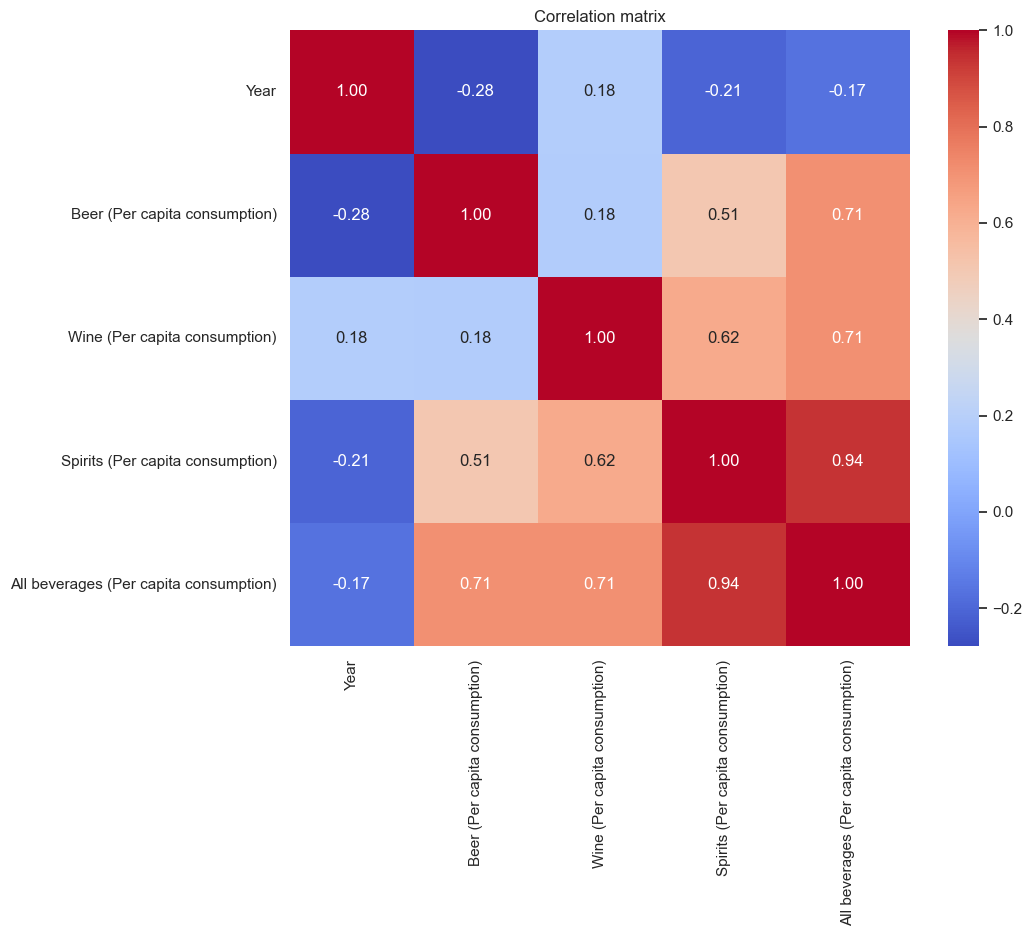

In [26]:
# Numeric distributions and correlation
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('Numeric columns:', num_cols)
if len(num_cols) > 0:
    df[num_cols].hist(figsize=(12, 8), bins=20)
    plt.tight_layout()
else:
    print('No numeric columns found to plot.')

if len(num_cols) > 1:
    corr = df[num_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation matrix')
    plt.show()